In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re



In [2]:
def parse_market_cap(mkt_cap_str):
    unit_dict = {'Million': 1e6, 'Billion': 1e9, 'Trillion': 1e12}
    unit_pat = '|'.join(unit_dict.keys())
    pattern = rf'\$([.0-9]*)\s*({unit_pat})'
    match = re.match(pattern, mkt_cap_str)
    amount, unit = match.groups()
    amount = float(amount) * unit_dict[unit]
    return amount


def normalize_exchanges_table(exchanges_table):
    exchanges_table = exchanges_table[['Country', 'Exchange', 'Market Cap (USD)']]
    exchanges_table.loc[:, 'Market Cap (USD)'] = exchanges_table[
        'Market Cap (USD)'
    ].apply(parse_market_cap)
    return exchanges_table



In [3]:
def parse_market_cap(mkt_cap_str):
    unit_dict = {'Million': 1e6, 'Billion': 1e9, 'Trillion': 1e12}
    unit_pat = '|'.join(unit_dict.keys())
    pattern = rf'\$([.0-9]*)\s*({unit_pat})'
    match = re.match(pattern, mkt_cap_str)
    amount, unit = match.groups()
    amount = float(amount) * unit_dict[unit]
    return amount


def normalize_exchanges_table(exchanges_table):
    exchanges_table = exchanges_table[['Country', 'Exchange', 'Market Cap (USD)']]
    exchanges_table.loc[:, 'Market Cap (USD)'] = exchanges_table[
        'Market Cap (USD)'
    ].apply(parse_market_cap)
    return exchanges_table



In [4]:
response = requests.get('https://www.tradinghours.com/markets-by-capitalization')
soup = BeautifulSoup(response.content, 'html.parser')
exchanges_table = soup.find('table', id='capTable')
exchanges_table = pd.read_html(str(exchanges_table))[0]
exchanges_table = normalize_exchanges_table(exchanges_table)

ConnectionError: HTTPSConnectionPool(host='www.tradinghours.com', port=443): Max retries exceeded with url: /markets-by-capitalization (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc694b11580>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [5]:
response = requests.get('https://www.tradinghours.com/markets-by-capitalization')
soup = BeautifulSoup(response.content, 'html.parser')
exchanges_table = soup.find('table', id='capTable')
exchanges_table = pd.read_html(str(exchanges_table))[0]
exchanges_table = normalize_exchanges_table(exchanges_table)

ConnectionError: HTTPSConnectionPool(host='www.tradinghours.com', port=443): Max retries exceeded with url: /markets-by-capitalization (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc693fc4c10>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [6]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re



In [7]:
def parse_market_cap(mkt_cap_str):
    unit_dict = {'Million': 1e6, 'Billion': 1e9, 'Trillion': 1e12}
    unit_pat = '|'.join(unit_dict.keys())
    pattern = rf'\$([.0-9]*)\s*({unit_pat})'
    match = re.match(pattern, mkt_cap_str)
    amount, unit = match.groups()
    amount = float(amount) * unit_dict[unit]
    return amount


def normalize_exchanges_table(exchanges_table):
    exchanges_table = exchanges_table[['Country', 'Exchange', 'Market Cap (USD)']]
    exchanges_table.loc[:, 'Market Cap (USD)'] = exchanges_table[
        'Market Cap (USD)'
    ].apply(parse_market_cap)
    return exchanges_table



In [8]:
response = requests.get('https://www.tradinghours.com/markets-by-capitalization')
soup = BeautifulSoup(response.content, 'html.parser')
exchanges_table = soup.find('table', id='capTable')
exchanges_table = pd.read_html(str(exchanges_table))[0]
exchanges_table = normalize_exchanges_table(exchanges_table)

ConnectionError: HTTPSConnectionPool(host='www.tradinghours.com', port=443): Max retries exceeded with url: /markets-by-capitalization (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc6954a3190>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [9]:
response = requests.get('https://www.tradinghours.com/markets-by-capitalization')
soup = BeautifulSoup(response.content, 'html.parser')
exchanges_table = soup.find('table', id='capTable')
exchanges_table = pd.read_html(str(exchanges_table))[0]
exchanges_table = normalize_exchanges_table(exchanges_table)

ConnectionError: HTTPSConnectionPool(host='www.tradinghours.com', port=443): Max retries exceeded with url: /markets-by-capitalization (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc693fc4280>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [10]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [11]:


def load_cac_table():
    cac_url = 'https://www.bnains.org/archives/histocac/histocac.php'
    response = requests.get(cac_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    cac_table = soup.find('table', class_='table table-bordered table-super-condensed')
    return pd.read_html(str(cac_table))[0]


def normalize_cac_table(cac_table):
    cac_table = (
        cac_table.loc[1:, ['Date', 'Sens', 'Sicovam ou ISIN', 'Valeur']]
        .rename({'Sens': 'Action', 'Sicovam ou ISIN': 'ISIN', 'Valeur': 'Name'}, axis=1)
        .set_index('Date')
    )
    cac_table = cac_table[cac_table['Action'].isin(['Admission', 'Retrait'])]
    cac_table.loc[:, 'Action'] = cac_table['Action'].map(
        {'Admission': 'In', 'Retrait': 'Out'}
    )
    cac_table.index = pd.to_datetime(cac_table.index, format='%d/%m/%Y')
    return cac_table



In [12]:

cac_table = load_cac_table().pipe(normalize_cac_table)


ConnectionError: HTTPSConnectionPool(host='www.bnains.org', port=443): Max retries exceeded with url: /archives/histocac/histocac.php (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc6954a38b0>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [13]:
response = requests.get('https://www.tradinghours.com/markets-by-capitalization')
soup = BeautifulSoup(response.content, 'html.parser')
exchanges_table = soup.find('table', id='capTable')
exchanges_table = pd.read_html(str(exchanges_table))[0]
exchanges_table = normalize_exchanges_table(exchanges_table)

In [14]:

from qplot import get_axes

tmp = exchanges_table.set_index('Exchange')['Market Cap (USD)']
tmp = tmp.sort_values(ascending=False)[:20]

<AxesSubplot:xlabel='Exchange'>

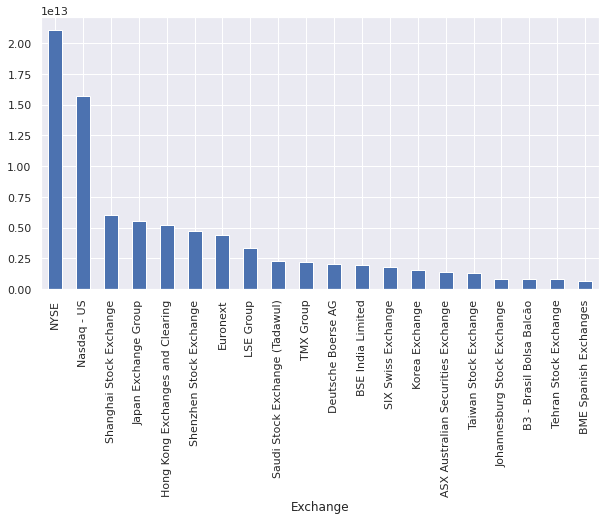

In [15]:
ax = get_axes(10)
tmp.plot.bar(ax=ax)



2020-09-08 15:58:12.200 | INFO     | qplot.activate:<module>:26 - IPython detected, applying inline plotting and svg figure format.


<AxesSubplot:xlabel='Exchange'>

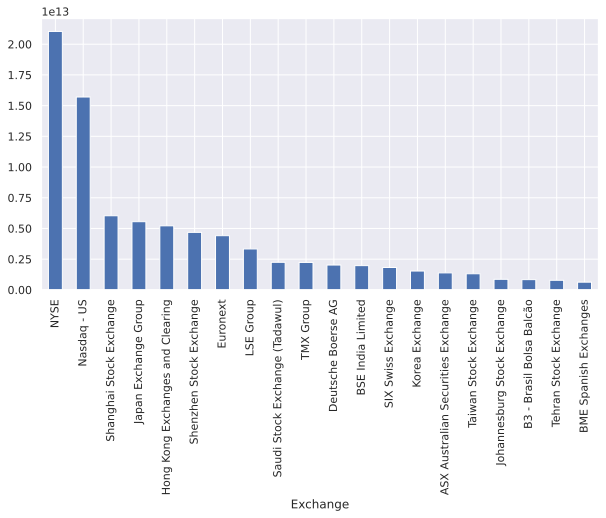

In [16]:
import qplot.activate
ax = get_axes(10)
tmp.plot.bar(ax=ax)



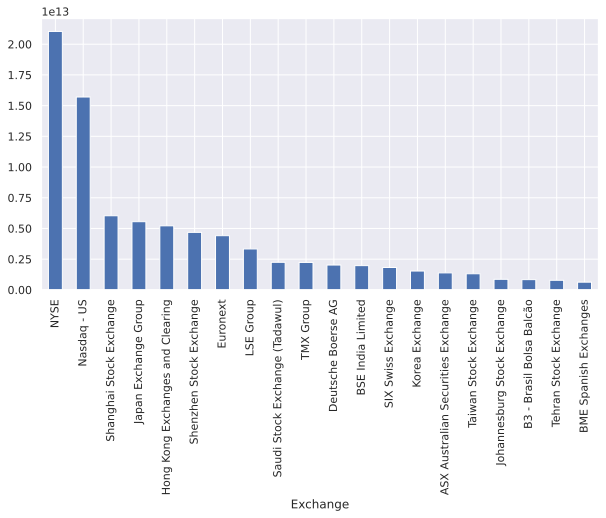

In [17]:
import qplot.activate
ax = get_axes(10)
tmp.plot.bar(ax=ax);

